In [50]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [51]:
"""
    campo_ode(t0, tf, y0, yf, f; N = 10)
    campo_ode!(p, t0, tf, y0, yf, f; N = 10)

Desenha `y'(t) = f(t, y)` na caixa [t0, tf] × [y0, tf].
"""
function campo_ode!(p, t0, tf, y0, yf, f; N = 11)
    rt = range(t0, tf, length=N)
    ry = range(y0, yf, length=N)
    h = rt[2] - rt[1]
    C = vcat([[rt[i], ry[j], 0.9h, f(rt[i], ry[j])]' for i = 1:N, j = 1:N]...)
    C[:,4] /= maximum(abs.(C[:,4]))
    quiver!(p, C[:,1], C[:,2], quiver=(C[:,3],C[:,4]), c=:lightblue)
    scatter!(p, C[:,1], C[:,2], m=(2, :lightblue, stroke(1,:blue)))
    xlims!(t0 - h/2, tf + h/2)
    ylims!(y0 - h/2, yf + h/2)
    p
end

function campo_ode(args...; kwargs...)
    p = plot(leg=false)
    campo_ode!(p, args...; kwargs...)
end

campo_ode (generic function with 2 methods)

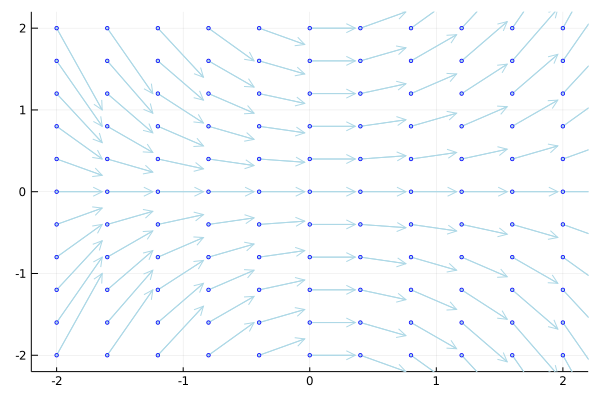

In [52]:
campo_ode(-2, 2, -2, 2, (t,y) -> t * y)

In [53]:
function euler(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        w[k+1] = w[k] + h * f(t[k], w[k])
    end
    return t, w
end

euler (generic function with 1 method)

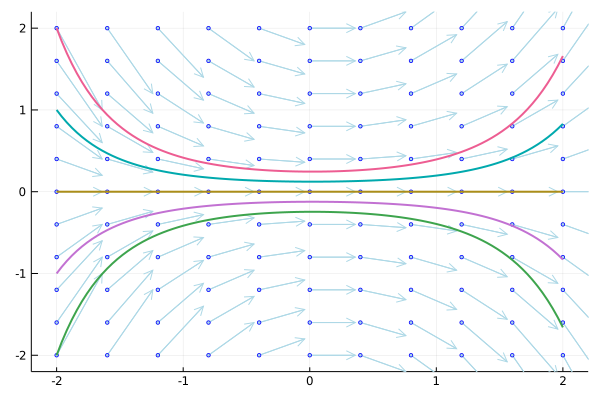

In [54]:
t0, tf = -2.0, 2.0
f(t,y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
for y0 in [-2, -1, 0, 1, 2]
    t, y = euler(t0, tf, y0, f)
    plot!(p, t, y, lw=2)
end
p

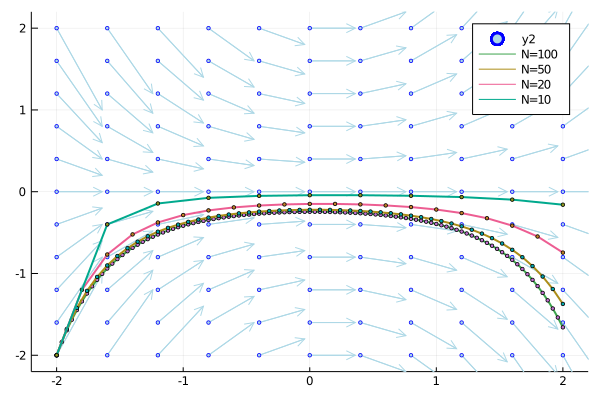

In [56]:
t0, tf = -2.0, 2.0
f(t,y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
y0 = -2
for N = [100, 50, 20, 10]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
    scatter!(p, t, y, lw=2, ms=2, lab="")
end
p

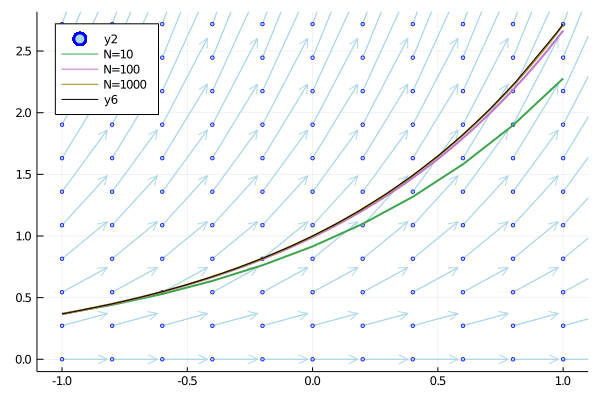

In [60]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
p = campo_ode(t0, tf, 0, ysol(tf), f)
for N = [10, 100, 1000]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
end
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

In [61]:
function taylor2(t0, tf, y0, f, ft, fy; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        fk = f(t[k], w[k])
        ftk = ft(t[k], w[k])
        fyk = fy(t[k], w[k])
        w[k+1] = w[k] + h * fk + h^2 / 2 * (ftk + fyk * fk)
    end
    return t, w
end

taylor2 (generic function with 1 method)

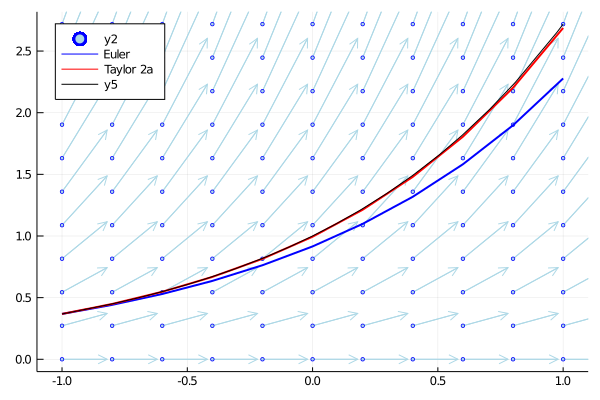

In [62]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

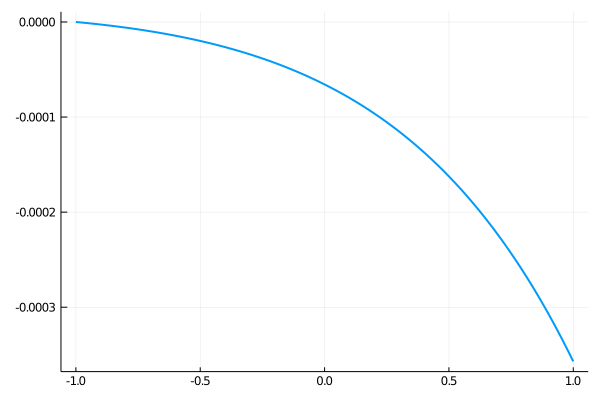

In [70]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
# t, y = euler(t0, tf, y0, f, N=100)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=100)
plot(t, y - ysol.(t), lw=2, leg=false)


In [80]:
function rungekutta2(t0, tf, y0, f, β; N = 100)
    @assert β != 0
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    α = 1 - β
    δ = γ = 1 / 2β
    for k = 1:N
        θ₁ = f(t[k], w[k])
        θ₂ = f(t[k] + δ * h, w[k] + γ * h * θ₁)
        w[k+1] = w[k] + h * (α * θ₁ + β * θ₂)
    end
    return t, w
end

rungekutta2 (generic function with 1 method)

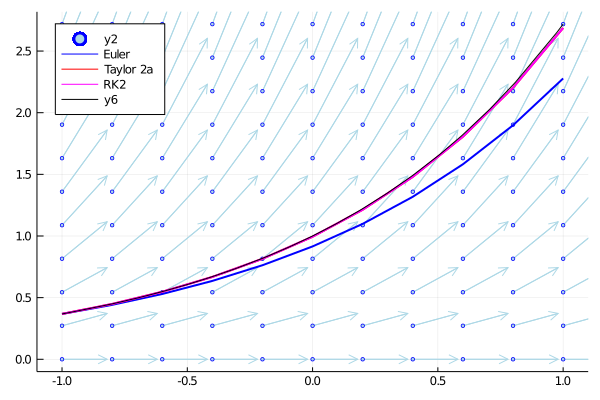

In [81]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t,y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=10)
plot!(p, t, y, lw=2, lab="RK2", c=:magenta, leg=true)
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

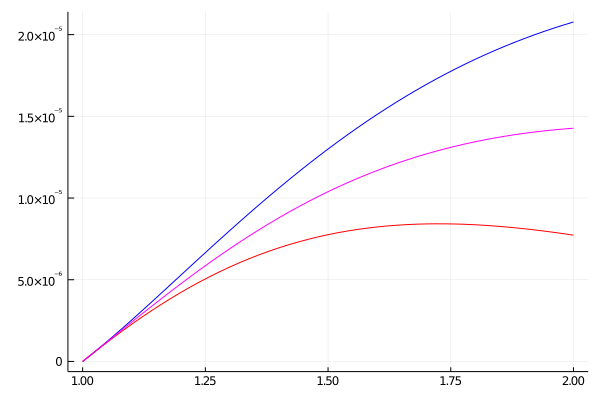

In [87]:
#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#
t0, tf = 1.0, 2.0
ysol(t) = t^2 * exp(-t)
y0 = ysol(t0)
f(t,y) = 2y / t - y

plot(leg=false)
t, y = rungekutta2(t0, tf, y0, f, 0.5, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:blue)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:red)
t, y = rungekutta2(t0, tf, y0, f, 2/3, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:magenta)

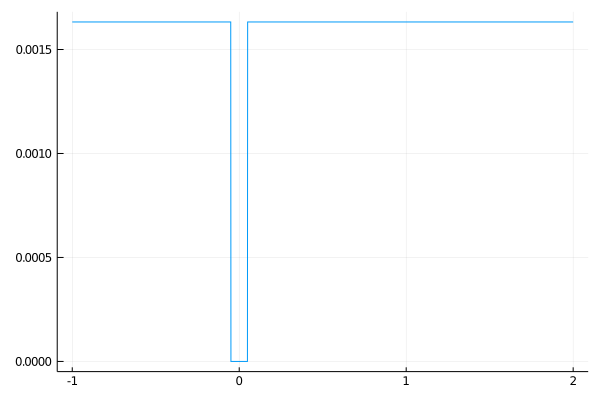

In [91]:
using LinearAlgebra

#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#
t0, tf = 1.0, 2.0
# ysol(t) = t^2 * exp(-t)
# f(t,y) = 2y / t - y
ysol(t) = exp(t)
f(t,y) = y
y0 = ysol(t0)

E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end

plot(E, -1, 2, leg=false)